In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt
from pmdarima.arima import auto_arima

plt.style.use('seaborn')

Name: Keshav Aggarwal  
Roll No: QE2113

# Importing and manipulating the data

In [138]:
aqi_data = pd.read_csv("chicago_air_pollution.csv")

In [139]:
chicago_aqi = aqi_data[['tmpd','date','pm10tmean2']]

In [142]:
chicago_aqi.head()

,tmpd,date,pm10tmean2
0,31.5,1987-01-01,34.000000
1,33.0,1987-01-02,34.000000
2,33.0,1987-01-03,34.166667
3,29.0,1987-01-04,47.000000
4,32.0,1987-01-05,47.000000


In [141]:
chicago_aqi.pm10tmean2.fillna(method='ffill',inplace=True)

C:\Users\keshacker\AppData\Local\Temp\ipykernel_8008\1691516590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_aqi.pm10tmean2.fillna(method='ffill',inplace=True)


In [143]:
np.sum(chicago_aqi.pm10tmean2[-2500:].isna())

0

In [ ]:
dates = pd.to_datetime(chicago_aqi.date.values,format='%Y-%m-%d')
dates = dates.dropna()

In [254]:
datewise_data = pd.Series(chicago_aqi.pm10tmean2[-2500:].values,index=dates[-2500:])

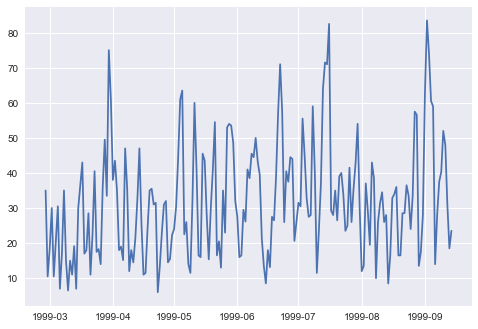

In [255]:
plt.plot(datewise_data[0:200])

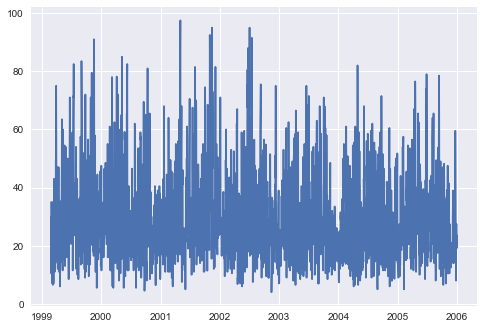

In [258]:
plt.plot(datewise_data)
plt.show()

In [248]:
print("P-value of ADF Test:{:.2f}".format(sm.tsa.stattools.adfuller(datewise_data)[1]))

P-value of ADF Test:0.00


In [250]:
datewise_data.head()

1999-02-27    35.00
1999-02-28    10.50
1999-03-01    18.25
1999-03-02    30.00
1999-03-03    10.50
dtype: float64

ACF and PACF of original data

c:\Users\keshacker\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


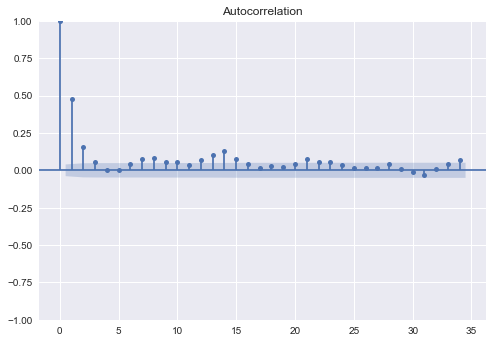

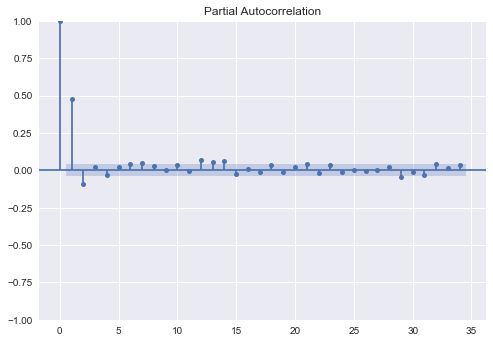

In [183]:
plot_acf(datewise_data)
plot_pacf(datewise_data)
plt.show()

ACF and PACF after single differencing

c:\Users\keshacker\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


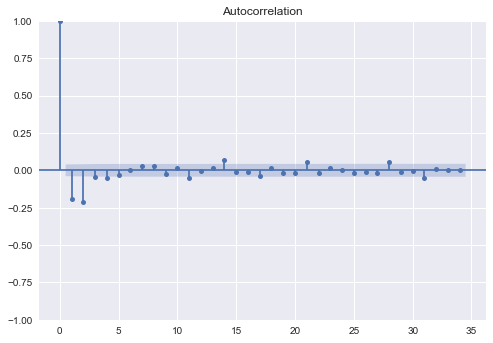

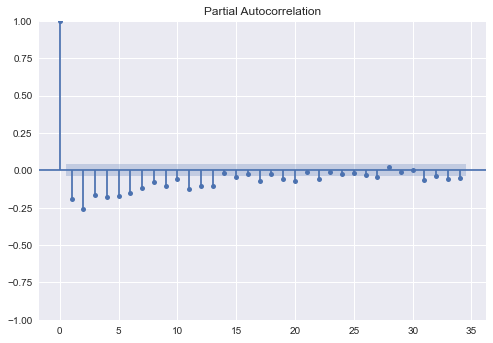

In [184]:
plot_acf(datewise_data.diff().dropna())
plot_pacf(datewise_data.diff().dropna())
plt.show()

<AxesSubplot:ylabel='pm10tmean2'>

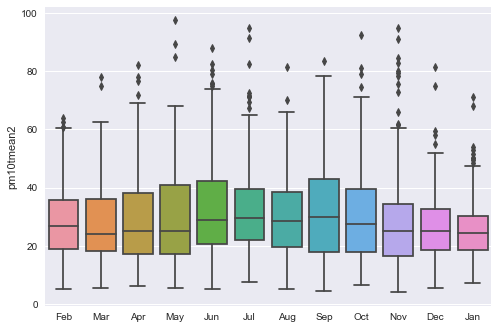

In [149]:
month = dates[-2500:].strftime('%b')
sns.boxplot(x=month,y=chicago_aqi.pm10tmean2[-2500:])


C:\Users\keshacker\AppData\Local\Temp\ipykernel_8008\3284795176.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  sns.boxplot(x=datewise_data.index.week,y=datewise_data.values)


<AxesSubplot:>

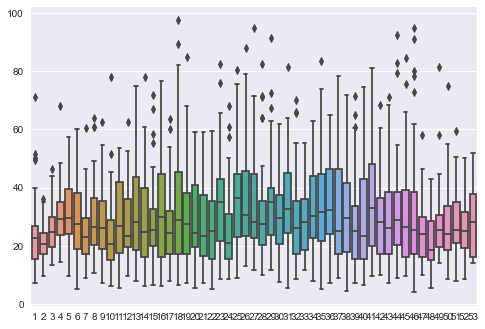

In [172]:
sns.boxplot(x=datewise_data.index.week,y=datewise_data.values)

<AxesSubplot:>

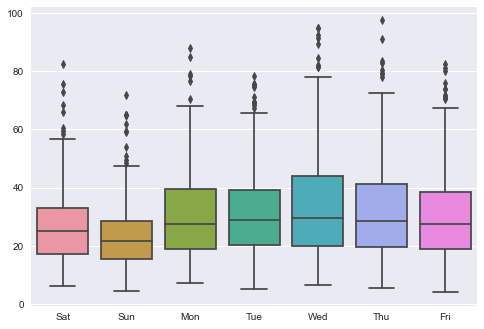

In [199]:
sns.boxplot(x=datewise_data.index.strftime('%a'),y=datewise_data.values)

## Fitting of Model

In [153]:
size = int(data.count()*0.8)
train, test = datewise_data[:size],datewise_data[size:]

In [220]:
model_arima = auto_arima(train,m=7)
print(model_arima.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                 2000
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 7)   Log Likelihood               -8079.786
Date:                             Wed, 25 May 2022   AIC                          16171.572
Time:                                     20:01:17   BIC                          16205.175
Sample:                                          0   HQIC                         16183.911
                                            - 2000                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0005      0.001     -0.489      0.625      -0.003       0.002
ma.L1         -0.5282      

Therefore, the data is said to follow SARIMA $(0,1,2)*(1,0,1)_{7}$ process:
$$ \nabla Y_t = \phi_1 \nabla Y_{t-7} + E_t + \theta_1 E_{t-1} + \theta_2 E_{t-2} + \Theta_1 E_{t-7} $$
With  $\phi_1 = 0.9499, \theta_1 = -0.5282, \theta_2 = -0.4337, \Theta_1 = -0.9274 $ and $E_t \sim N(0,189.8348)$

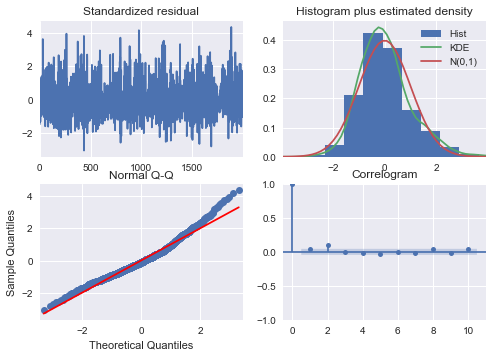

In [223]:
model_arima.plot_diagnostics()
plt.show()

In [186]:
model_alt = auto_arima(train)
print(model_alt.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2000
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -8085.926
Date:                Wed, 25 May 2022   AIC                          16179.852
Time:                        18:52:58   BIC                          16202.254
Sample:                             0   HQIC                         16188.078
                               - 2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2727      0.042      6.459      0.000       0.190       0.355
ma.L1         -0.7656      0.046    -16.635      0.000      -0.856      -0.675
ma.L2         -0.2170      0.044     -4.881      0.0

Therefore, the data is said to follow ARIMA(1,1,2) process:
$$ \nabla Y_t = \phi_1 \nabla Y_{t-1} + E_t + \theta_1 E_{t-1} + \theta_2 E_{t-2} $$
With $ \phi_1 = 0.2727 \theta_1 = -0.7656, \theta_2 = -0.2170 $ and $E_t \sim N(0,190.7)$

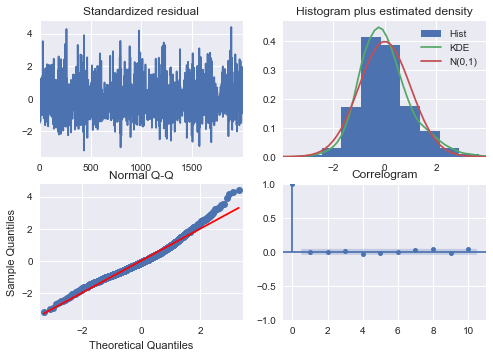

In [224]:
model_alt.plot_diagnostics()
plt.show()

In [189]:
model_seasonal = sm.tsa.statespace.SARIMAX(train,order=(0,1,2),seasonal_order=(1,0,1,7)).fit(disp=False)
model_arimaxed = sm.tsa.statespace.SARIMAX(train,order=(1,1,2)).fit(disp=False)

c:\Users\keshacker\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\keshacker\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\keshacker\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\keshacker\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


# Prediction of data

## Using SARIMA Process

### ARIMA(1,1,2)

In sample Prediction

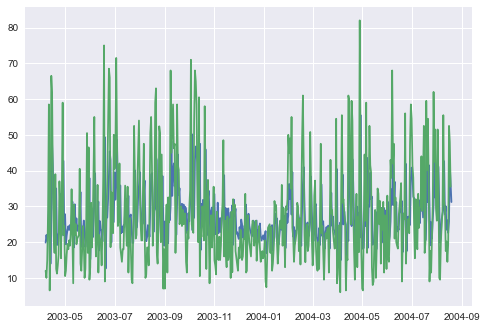

In [190]:
prediction112 = model_arimaxed.predict(start=1500,end=2000)
plt.plot(prediction112)
plt.plot(train[-500:])
plt.show()

In [225]:
MSE = np.mean((train-model_arimaxed.predict(start=0,end=size))**2)
print("In-sample MSE =",MSE)

In-sample MSE = 191.47177156935345


Out-Sample Forecasting

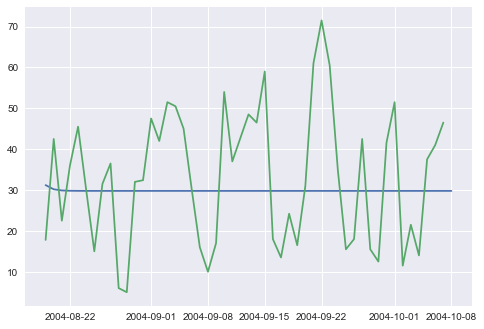

In [260]:
forecast112 = model_arimaxed.predict(start=size,end=size+50,dynamic=True)
plt.plot(forecast112)
plt.plot(test[:50])
plt.show()
# forecast112 = model_arimaxed.forecast(50)
# plt.plot(forecast112)
# plt.plot(test[:50])
# plt.show()

In [227]:
MSE = np.mean((test-model_arimaxed.forecast(500))**2)
print("Out-sample MSE =",MSE)

Out-sample MSE = 199.87329160457224


### SARIMA $(0,1,2)*(1,0,1)_{7}$

In sample Prediction

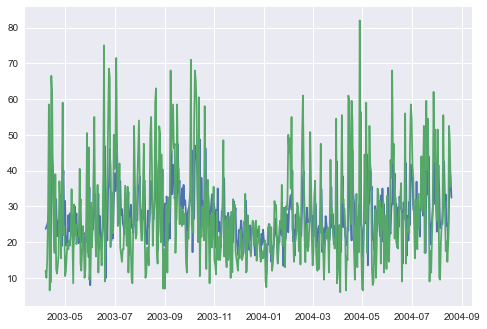

In [193]:
prediction_seasonal = model_seasonal.predict(start=1500,end=2000)
plt.plot(prediction_seasonal)
plt.plot(train[-500:])
plt.show()

In [228]:
MSE = np.mean((train-model_seasonal.predict(start=0,end=size))**2)
print("In-sample MSE =",MSE)

In-sample MSE = 187.64733233630773


Out-Sample Forecasting

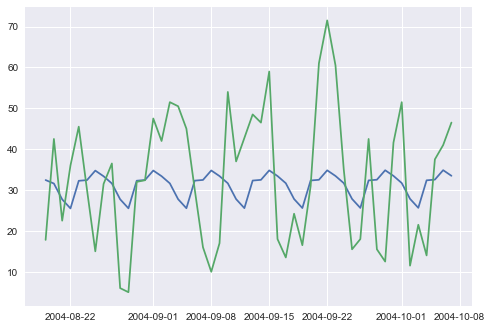

In [195]:
forecast_seasonal = model_seasonal.forecast(50)
plt.plot(forecast_seasonal)
plt.plot(test[:50])
plt.show()

In [229]:
MSE = np.mean((test-model_seasonal.forecast(500))**2)
print("Out-sample MSE =",MSE)

Out-sample MSE = 201.99566276723448


## Using Holt Winter's

### Simple Exp Smoothing

In [200]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt

In [207]:
SES = SimpleExpSmoothing(train,initialization_method='estimated').fit(optimized=True)

c:\Users\keshacker\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In-Sample Fit

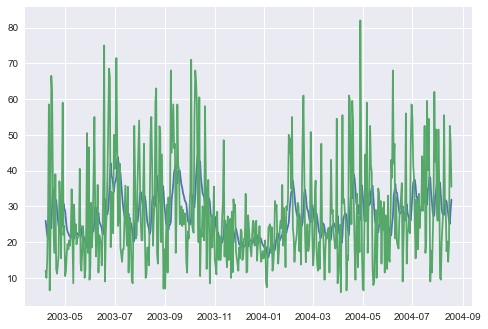

In [208]:
plt.plot(SES.fittedvalues[-500:])
plt.plot(train[-500:])
plt.show()

In [230]:
MSE = np.mean((train-SES.fittedvalues)**2)
print("In-Samaple MSE=",MSE)

In-Samaple MSE= 231.87562267542683


Out-Sample Forecasting

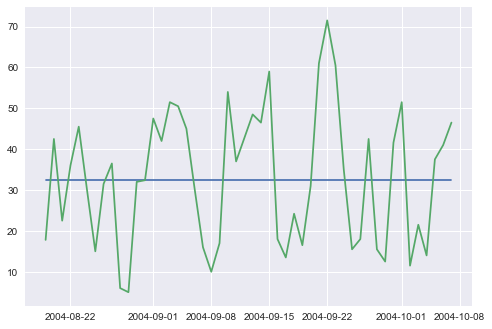

In [209]:
plt.plot(SES.forecast(50))
plt.plot(test[:50])
plt.show()

In [231]:
MSE = np.mean((test-SES.forecast(500))**2)
print("Out-sample MSE =",MSE)

Out-sample MSE = 213.94276690263737


### Holt Exponential Smoothing

In [210]:
HES = Holt(train,initialization_method='estimated',exponential=False).fit(optimized=True)

c:\Users\keshacker\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In-Sample Fit

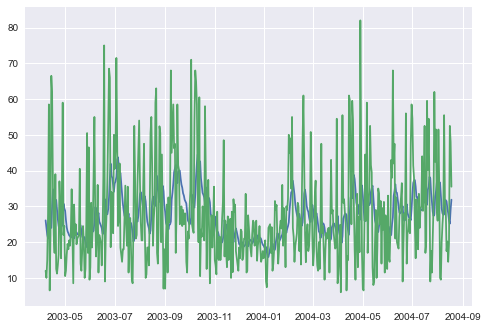

In [211]:
plt.plot(HES.fittedvalues[-500:])
plt.plot(train[-500:])
plt.show()

In [234]:
MSE = np.mean((train-HES.fittedvalues)**2)
print("In-Samaple MSE=",MSE)

In-Samaple MSE= 231.89732322064063


Out-Sample Forecasting

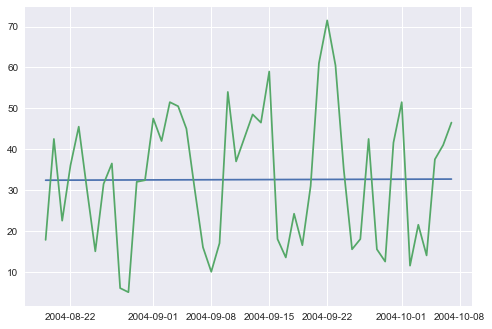

In [212]:
plt.plot(HES.forecast(50))
plt.plot(test[:50])
plt.show()

In [232]:
MSE = np.mean((test-HES.forecast(500))**2)
print("Out-sample MSE =",MSE)

Out-sample MSE = 228.41920891619094


### Holt Winter's Exponential Smoothing

In [216]:
HWES1 = ExponentialSmoothing(train,initialization_method='estimated',seasonal='add',trend='add').fit(optimized=True)
HWES2 = ExponentialSmoothing(train,initialization_method='estimated',seasonal='add',trend='add',seasonal_periods=7).fit(optimized=True)


c:\Users\keshacker\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\keshacker\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In-Sample Fit

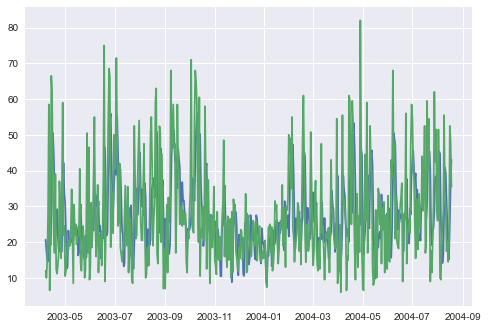

In [214]:
plt.plot(HWES1.fittedvalues[-500:])
plt.plot(train[-500:])
plt.show()

In [235]:
MSE = np.mean((train-HWES1.fittedvalues)**2)
print("In-Samaple MSE=",MSE)

In-Samaple MSE= 223.59814443755428


Out-Sample Forecasting

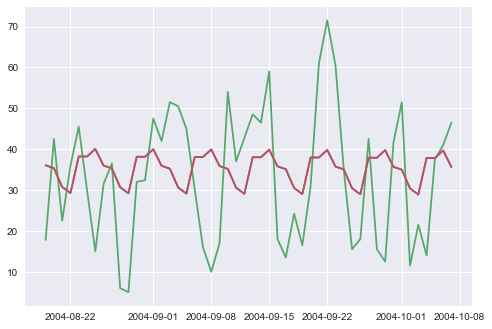

In [218]:
plt.plot(HWES2.forecast(50))
plt.plot(test[:50])
plt.plot(HWES1.forecast(50))
plt.show()

In [233]:
MSE = np.mean((test-HWES1.forecast(500))**2)
print("Out-sample MSE =",MSE)

Out-sample MSE = 214.11300719129403


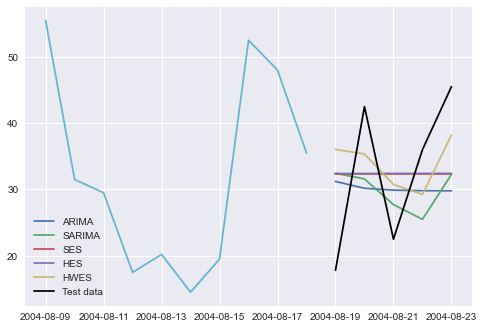

In [261]:
plt.plot(model_arimaxed.forecast(5),label="ARIMA")
plt.plot(model_seasonal.forecast(5),label='SARIMA')
plt.plot(SES.forecast(5),label='SES')
plt.plot(HES.forecast(5),label='HES')
plt.plot(HWES1.forecast(5),label='HWES')
plt.plot(test[:5],label='Test data',color='black')
plt.plot(train[-10:])
plt.legend()
plt.show()

In [245]:
print("***ERROR FOR FIRST FIVE PREDICTIONS***")
print("ARIMA error:", np.round(np.var(test[:5]-model_arimaxed.forecast(5))))
print("SARIMA error:", np.round(np.var(test[:5]-model_seasonal.forecast(5))))
print("SES error:", np.round(np.var(test[:5]-SES.forecast(5))))
print("HES error:", np.round(np.var(test[:5]-HES.forecast(5))))
print("HWES error:", np.round(np.var(test[:5]-HWES1.forecast(5))))

***ERROR FOR FIRST FIVE PREDICTIONS***
ARIMA error: 127.0
SARIMA error: 120.0
SES error: 119.0
HES error: 119.0
HWES error: 109.0
